In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
## Lets create synthetic datapoints
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)


In [3]:
x

array([[ 1.05532816,  1.41864278],
       [ 0.43588217,  1.50189507],
       [ 0.39400321,  1.50153413],
       ...,
       [ 1.26572568,  0.33379854],
       [ 0.61309569, -1.20294842],
       [-0.73075239,  2.9770719 ]])

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [5]:
pd.DataFrame(x)[0]

0      1.055328
1      0.435882
2      0.394003
3      3.065046
4      1.159054
         ...   
995    0.508441
996    2.497759
997    1.265726
998    0.613096
999   -0.730752
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

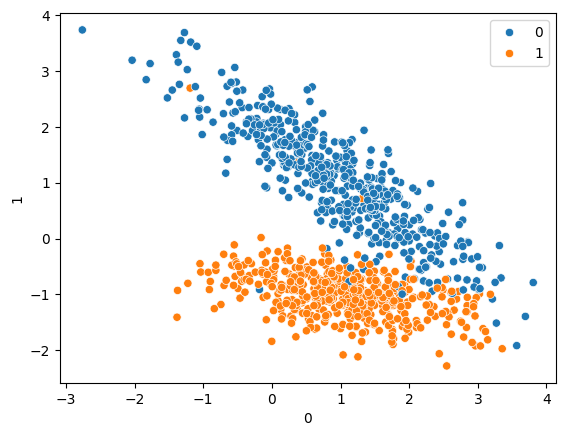

In [6]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
svc = SVC(kernel='linear')

In [9]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [10]:
y_pred = svc.predict(x_test)

In [11]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.972
[[123   5]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.96      0.98      0.97       122

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



<Axes: xlabel='0', ylabel='1'>

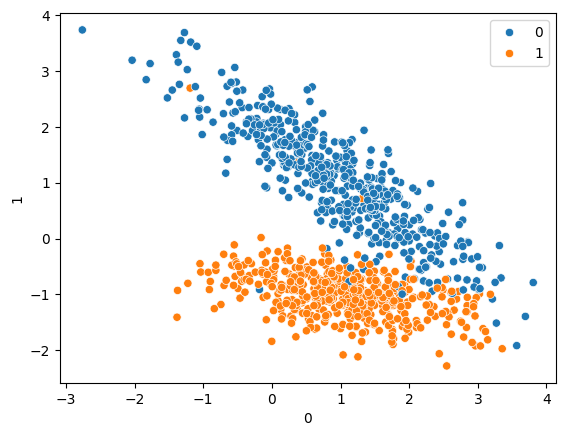

In [12]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)


In [13]:
## here we would see that points are separable linearly 

## what if we change the n_cluster into 2 then we get the non-linear datapoint , so we need to use the different kernel line polynomiyal etc...
## Let see that now 

In [14]:
x,y = make_classification(n_samples = 1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

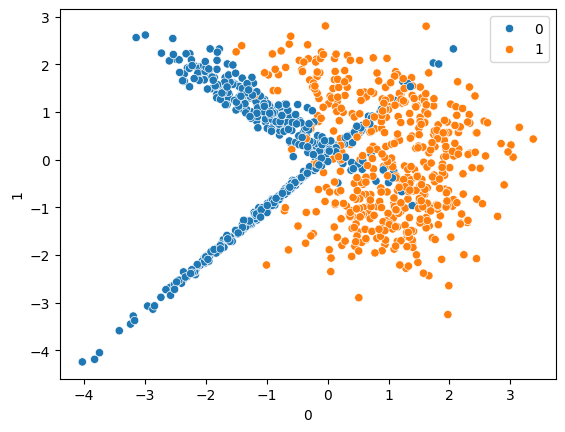

In [15]:
sns.scatterplot(x= pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)  ## now you can see that we got different point 

In [16]:
## Let go throught the different kernels

0.915
[[89  9]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        98
           1       0.91      0.92      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



<Axes: >

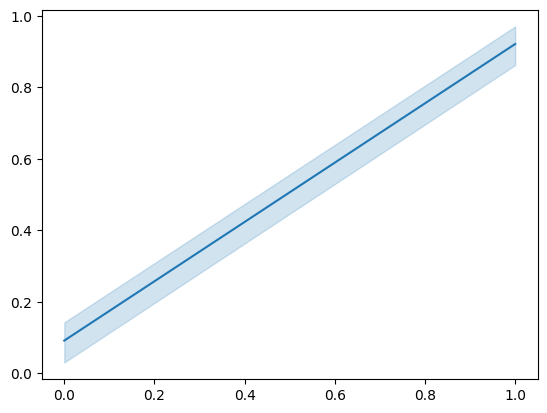

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=15)
svcr = SVC(kernel='rbf')
svcr.fit(x_train,y_train)
y_predr = svcr.predict(x_test)
print(accuracy_score(y_test,y_predr))
print(confusion_matrix(y_test,y_predr))
print(classification_report(y_test,y_predr))
sns.lineplot(x = y_test,y = y_predr)

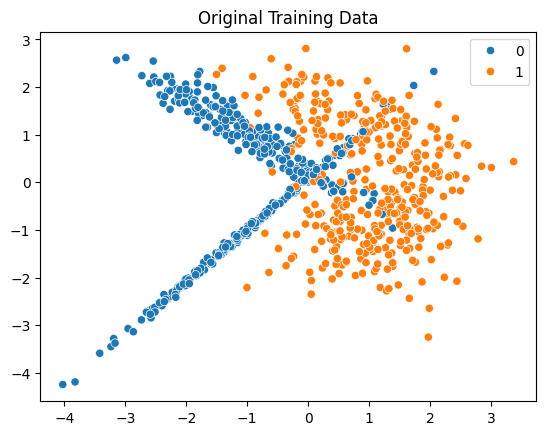

In [18]:
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train)
plt.title("Original Training Data")
plt.show()
## before the kernel applied 

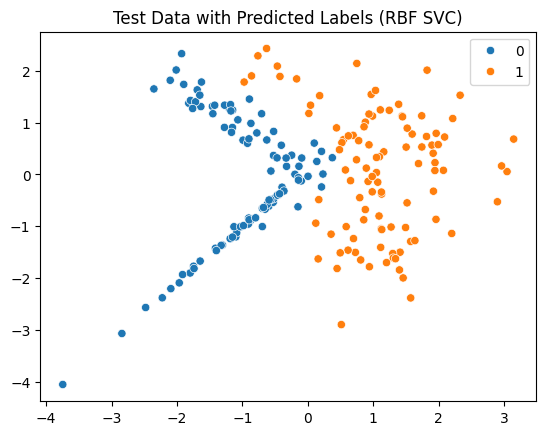

In [19]:
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_predr)
plt.title("Test Data with Predicted Labels (RBF SVC)")
plt.show()
## the kernel get applied 

0.865
[[90  8]
 [19 83]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        98
           1       0.91      0.81      0.86       102

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



<Axes: >

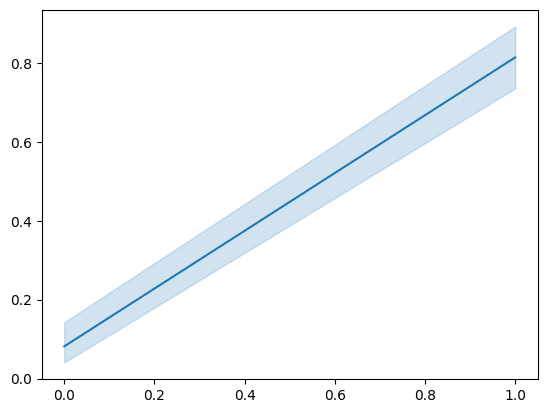

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=15)
svcr = SVC(kernel='poly')
svcr.fit(x_train,y_train)
y_predp = svcr.predict(x_test)
print(accuracy_score(y_test,y_predp))
print(confusion_matrix(y_test,y_predp))
print(classification_report(y_test,y_predp))
sns.lineplot(x = y_test,y = y_predp)

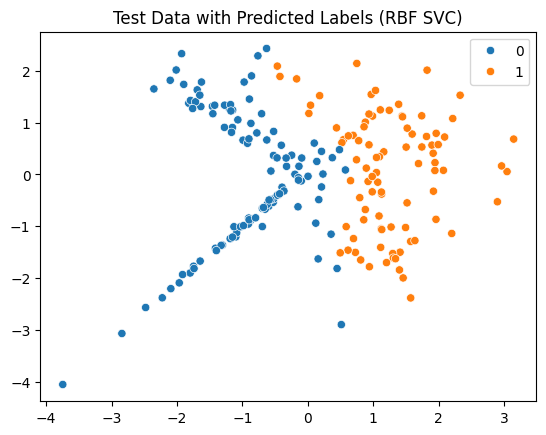

In [21]:
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_predp)
plt.title("Test Data with Predicted Labels (RBF SVC)")
plt.show()
## the kernel get applied 

0.835
[[86 12]
 [21 81]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        98
           1       0.87      0.79      0.83       102

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



<Axes: >

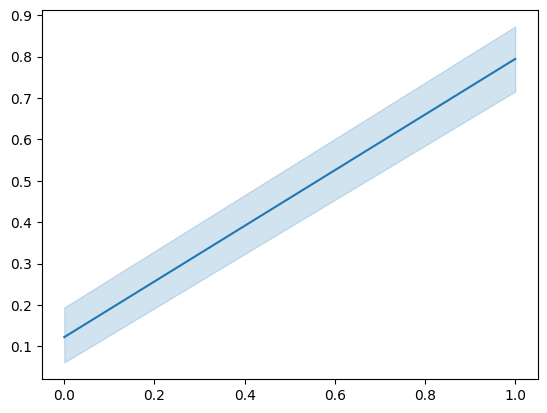

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=15)
svcr = SVC(kernel='sigmoid')
svcr.fit(x_train,y_train)
y_preds = svcr.predict(x_test)
print(accuracy_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
sns.lineplot(x = y_test,y = y_preds)

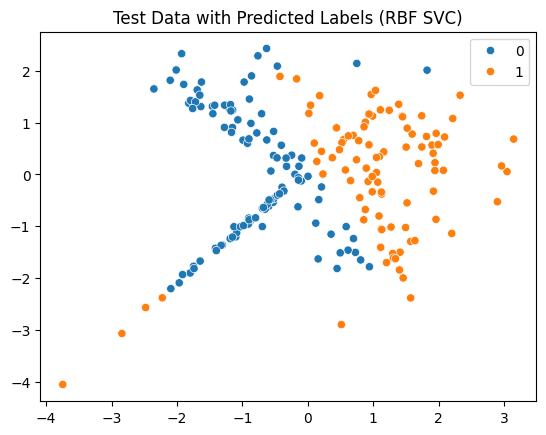

In [23]:
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_preds)
plt.title("Test Data with Predicted Labels (RBF SVC)")
plt.show()
## the kernel get applied 